In [1]:
import re

In [101]:
def hex_color_to_rgba(hex_color, normalize_to=255):
    color_pattern_one_digit = r'#(?P<R>[\da-fA-F])(?P<G>[\da-fA-F])(?P<B>[\da-fA-F])(?P<A>[\da-fA-F])?'
    color_pattern_two_digit = r'#(?P<R>[\da-fA-F]{2})(?P<G>[\da-fA-F]{2})(?P<B>[\da-fA-F]{2})(?P<A>[\da-fA-F]{2})?'

    match = re.match(color_pattern_two_digit, hex_color)

    if match:
        channels = match.groupdict()
        channel_scale = 255
        if channels['A'] is None:
            channels['A'] = 'ff'
    else:
        match = re.match(color_pattern_one_digit, hex_color)
        if match:
            channels = match.groupdict()
            if channels['A'] is None:
                channels['A'] = 'f'
            channel_scale = 15
        else:
            raise ValueError('Color string must be in format #RGB[A] or #RRGGBB[AA] '
                             '(i.e., alpha channel is optional)')

    scale = normalize_to / channel_scale
    return tuple(type(normalize_to)(int(channels[k], 16) * scale)
                 4or k in 'RGBA')

In [105]:
rgba = hex_color_to_rgba('#f0d3', normalize_to=1.)
rgba

(1.0, 0.0, 0.8666666666666667, 0.2)

In [7]:
from path_helpers import path
from svg_model import svg_polygons_to_df
from svg_model.connections import extract_connections
from svg_model.shapes_canvas import ShapesCanvas
from svg_model.tesselate import tesselate_shapes_frame
from svg_model.point_query import get_shapes_pymunk_space
from svg_model.plot import plot_shapes
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load device SVG

In [8]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [9]:
drawing_shape = pd.Series([1920, 1080], index=['width', 'height'])
device_svg = 'static/device.svg'
df_shapes = svg_polygons_to_df(device_svg, xpath='//svg:polygon')

In [11]:
#device_canvas = ShapesCanvas.from_svg(device_svg, padding_fraction=0.1, canvas_shape=drawing_shape)
#device_canvas = ShapesCanvas.from_svg(device_svg, padding_fraction=0, xpath='//svg:polygon')
#%lprun -f ShapesCanvas.__init__ -f get_shapes_pymunk_space -f tesselate_shapes_frame device_canvas = ShapesCanvas(df_shapes, "path_id")
device_canvas = ShapesCanvas(df_shapes, "path_id")
extract_connections(device_svg, device_canvas)

c:\users\christian\documents\github\svg_model\svg_model\connections.py:168: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  df_shape_connections_i.sort(axis=1, inplace=True)


,source,target,line_id


--------------------------------------------------

## Scale and center SVG points to drawing shape

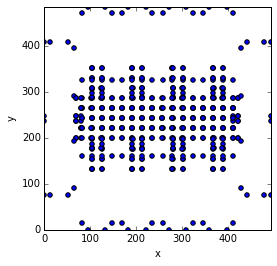

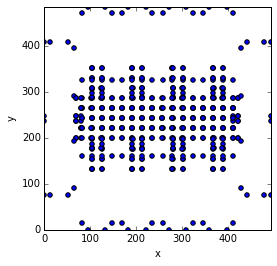

In [6]:
svg_shape = device_canvas.source_shape

svg_axis = device_canvas.df_shapes[['x', 'y']].plot(kind='scatter', x='x', y='y',
                                                    xlim=(0, svg_shape.width),
                                                    ylim=(0, svg_shape.height))                                          
drawing_axis = (device_canvas.df_canvas_shapes[['x', 'y']]
                .plot(kind='scatter', x='x', y='y',
                      xlim=(0, device_canvas.canvas_shape.width),
                      ylim=(0, device_canvas.canvas_shape.height)))
svg_axis.set_aspect(True)
drawing_axis.set_aspect(True)

--------------------------------------------------

## Tesselate *scaled* shapes into convex shapes and construct pymunk `Space`

### Draw tesselations in drawing layout

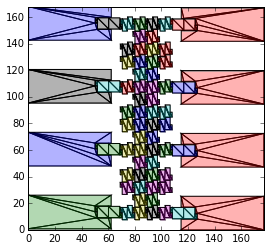

In [12]:
axis = plot_shapes(device_canvas.df_canvas_tesselations, ['path_id', 'triangle_i'],
                   fc='none')
plot_shapes(device_canvas.df_canvas_shapes, ['path_id'], alpha=.3, axis=axis)
axis.set_aspect(True)
axis.set_xlim(0, device_canvas.canvas_shape.width)
axis.set_ylim(0, device_canvas.canvas_shape.height)
pass

In [21]:
from svg_model.connections import extract_adjacent_shapes, extract_connections, draw_lines_svg_layer, get_adjacency_matrix
from svg_model import compute_shape_centers

device_svg = r'C:\Users\Christian\Documents\Github\test2.svg'
device_canvas = ShapesCanvas.from_svg(device_svg)

In [22]:
%timeit df_electrode_connections = extract_connections(device_svg, device_canvas)

The slowest run took 7.45 times longer than the fastest. This could mean that an intermediate result is being cached 
10 loops, best of 3: 17.5 ms per loop


In [ ]:
from lxml import etree

In [ ]:
%lprun -f extract_connections extract_connections("test.svg", device_canvas)

### Demonstrate electrode lookup based on drawing coordinates

In [ ]:
# output_filepath = 'device_connections.svg'
input_svg = r'C:\Users\Christian\Documents\Microdrop\devices\Paper Assay v11\device.svg'

output_xml = auto_detect_adjacent_shapes(input_svg)

with open('test.svg', 'wb') as output:
    output.write(etree.tostring(output_xml))

In [ ]:
import lxml

In [ ]:
lxml.etree.ElementTree